# Exercise: Analyzing Poker Hand Outcomes

Let's explore some data of poker hands that were created randomly, in this case, we start with the card listed and then deal out the remaining 7 cards to complete the hand and determine the highest rank of each hand that results. Let's create a function that plots the counts of each set of resulting hands by rank so that we can compare each hands strategic value:

In [85]:
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

poker = pd.read_csv("data/example_results.csv")
poker

,Cards,high card,pair,two pair,three of a kind,straight,flush,full house,four of a kind,straight flush
0,As Ks Qs Js,861,2125,946,166,1103,4115,58,2,624
1,8s 8c 7c 6s,0,3451,3856,767,1117,214,562,28,5
2,Kc 0c 7c 4c,1202,2654,1108,202,103,4661,61,1,8
3,As Jh 0d 8c,2321,4654,1578,238,1141,0,67,1,0
4,As Ah Ks Kh,0,0,7440,0,32,199,2274,54,1
5,As Kh Qs Jc,2053,3757,1479,242,2311,87,71,0,0
6,8s 8c 7c 6c,0,3079,3529,731,1019,985,551,26,80
7,8s 8c 8d,0,0,0,5854,74,72,3191,809,0
8,2h 7c 3d,2339,4718,2028,412,294,69,130,9,1
9,As Ad Ks Kd 4h,0,0,8322,0,0,0,1665,13,0


In [86]:
def hist_rank(ax, counts, labels):
    x = np.arange(0, len(counts))
    ax.bar(x, counts, tick_label=labels)
    ax.set_xticklabels(
        ax.get_xticklabels(), rotation=90
    )  # This rotates the labels and right-aligns them

Text(0.5, 1.0, 'Ah')

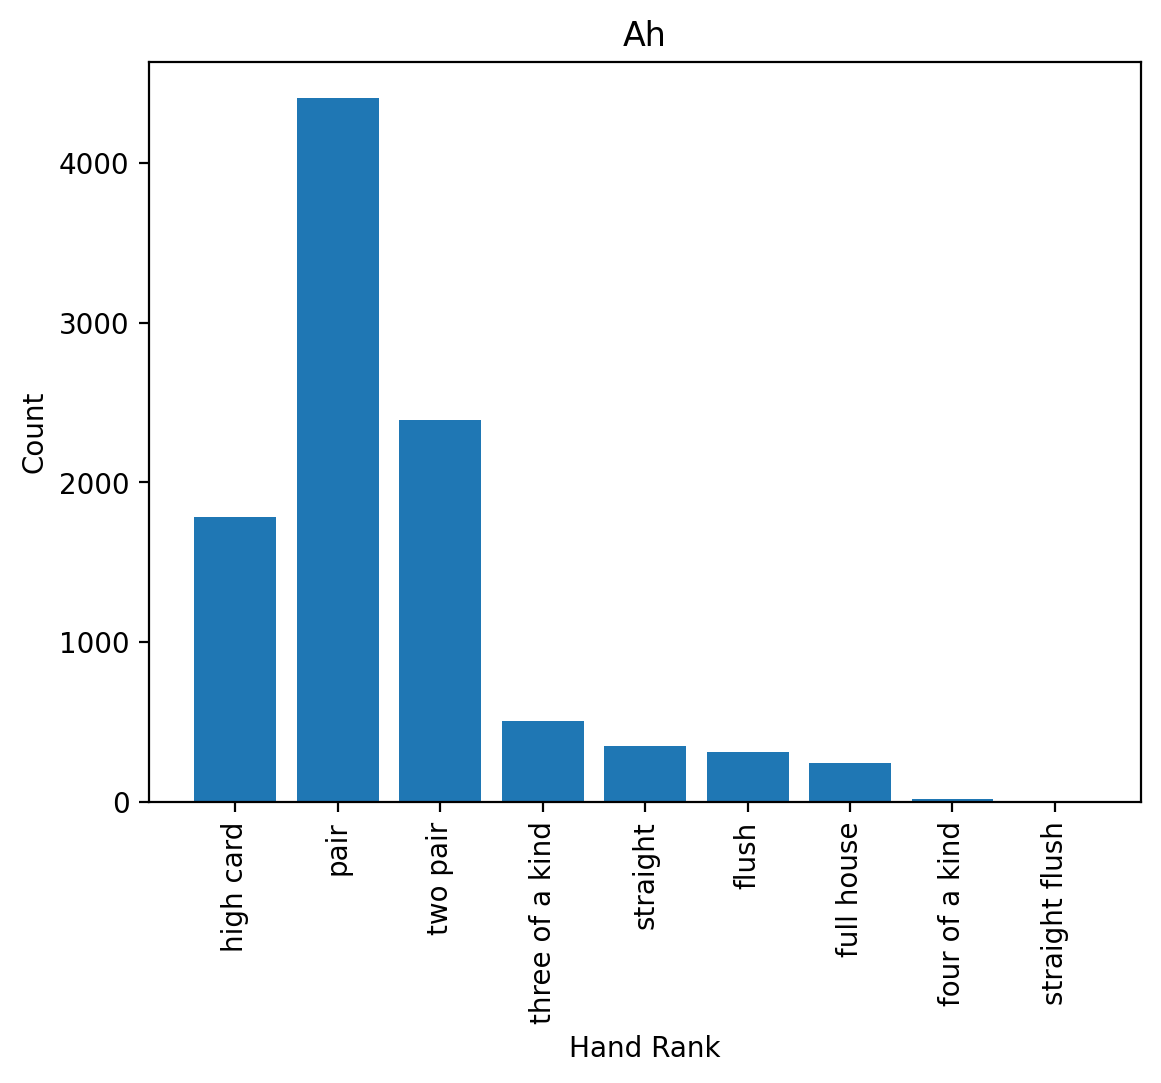

In [87]:
fig, ax = plt.subplots()

starting_hand = "Ah"
count_series = poker.loc[poker["Cards"] == starting_hand]
count_series = count_series.drop(columns=["Cards"])
counts = count_series.values[0]
labels = count_series.columns


hist_rank(ax, counts, labels)
ax.set_xlabel("Hand Rank")
ax.set_ylabel("Count")
ax.set_title(starting_hand)

In [88]:
poker.loc[poker["Cards"] == "Ah"]

,Cards,high card,pair,two pair,three of a kind,straight,flush,full house,four of a kind,straight flush
13,Ah,1781,4410,2390,503,345,311,241,16,3


Let's compare the distribution of outcomes of the first 9 sets of starting card in our dataset:

In [89]:
poker9 = poker.iloc[0:9]
poker9

,Cards,high card,pair,two pair,three of a kind,straight,flush,full house,four of a kind,straight flush
0,As Ks Qs Js,861,2125,946,166,1103,4115,58,2,624
1,8s 8c 7c 6s,0,3451,3856,767,1117,214,562,28,5
2,Kc 0c 7c 4c,1202,2654,1108,202,103,4661,61,1,8
3,As Jh 0d 8c,2321,4654,1578,238,1141,0,67,1,0
4,As Ah Ks Kh,0,0,7440,0,32,199,2274,54,1
5,As Kh Qs Jc,2053,3757,1479,242,2311,87,71,0,0
6,8s 8c 7c 6c,0,3079,3529,731,1019,985,551,26,80
7,8s 8c 8d,0,0,0,5854,74,72,3191,809,0
8,2h 7c 3d,2339,4718,2028,412,294,69,130,9,1


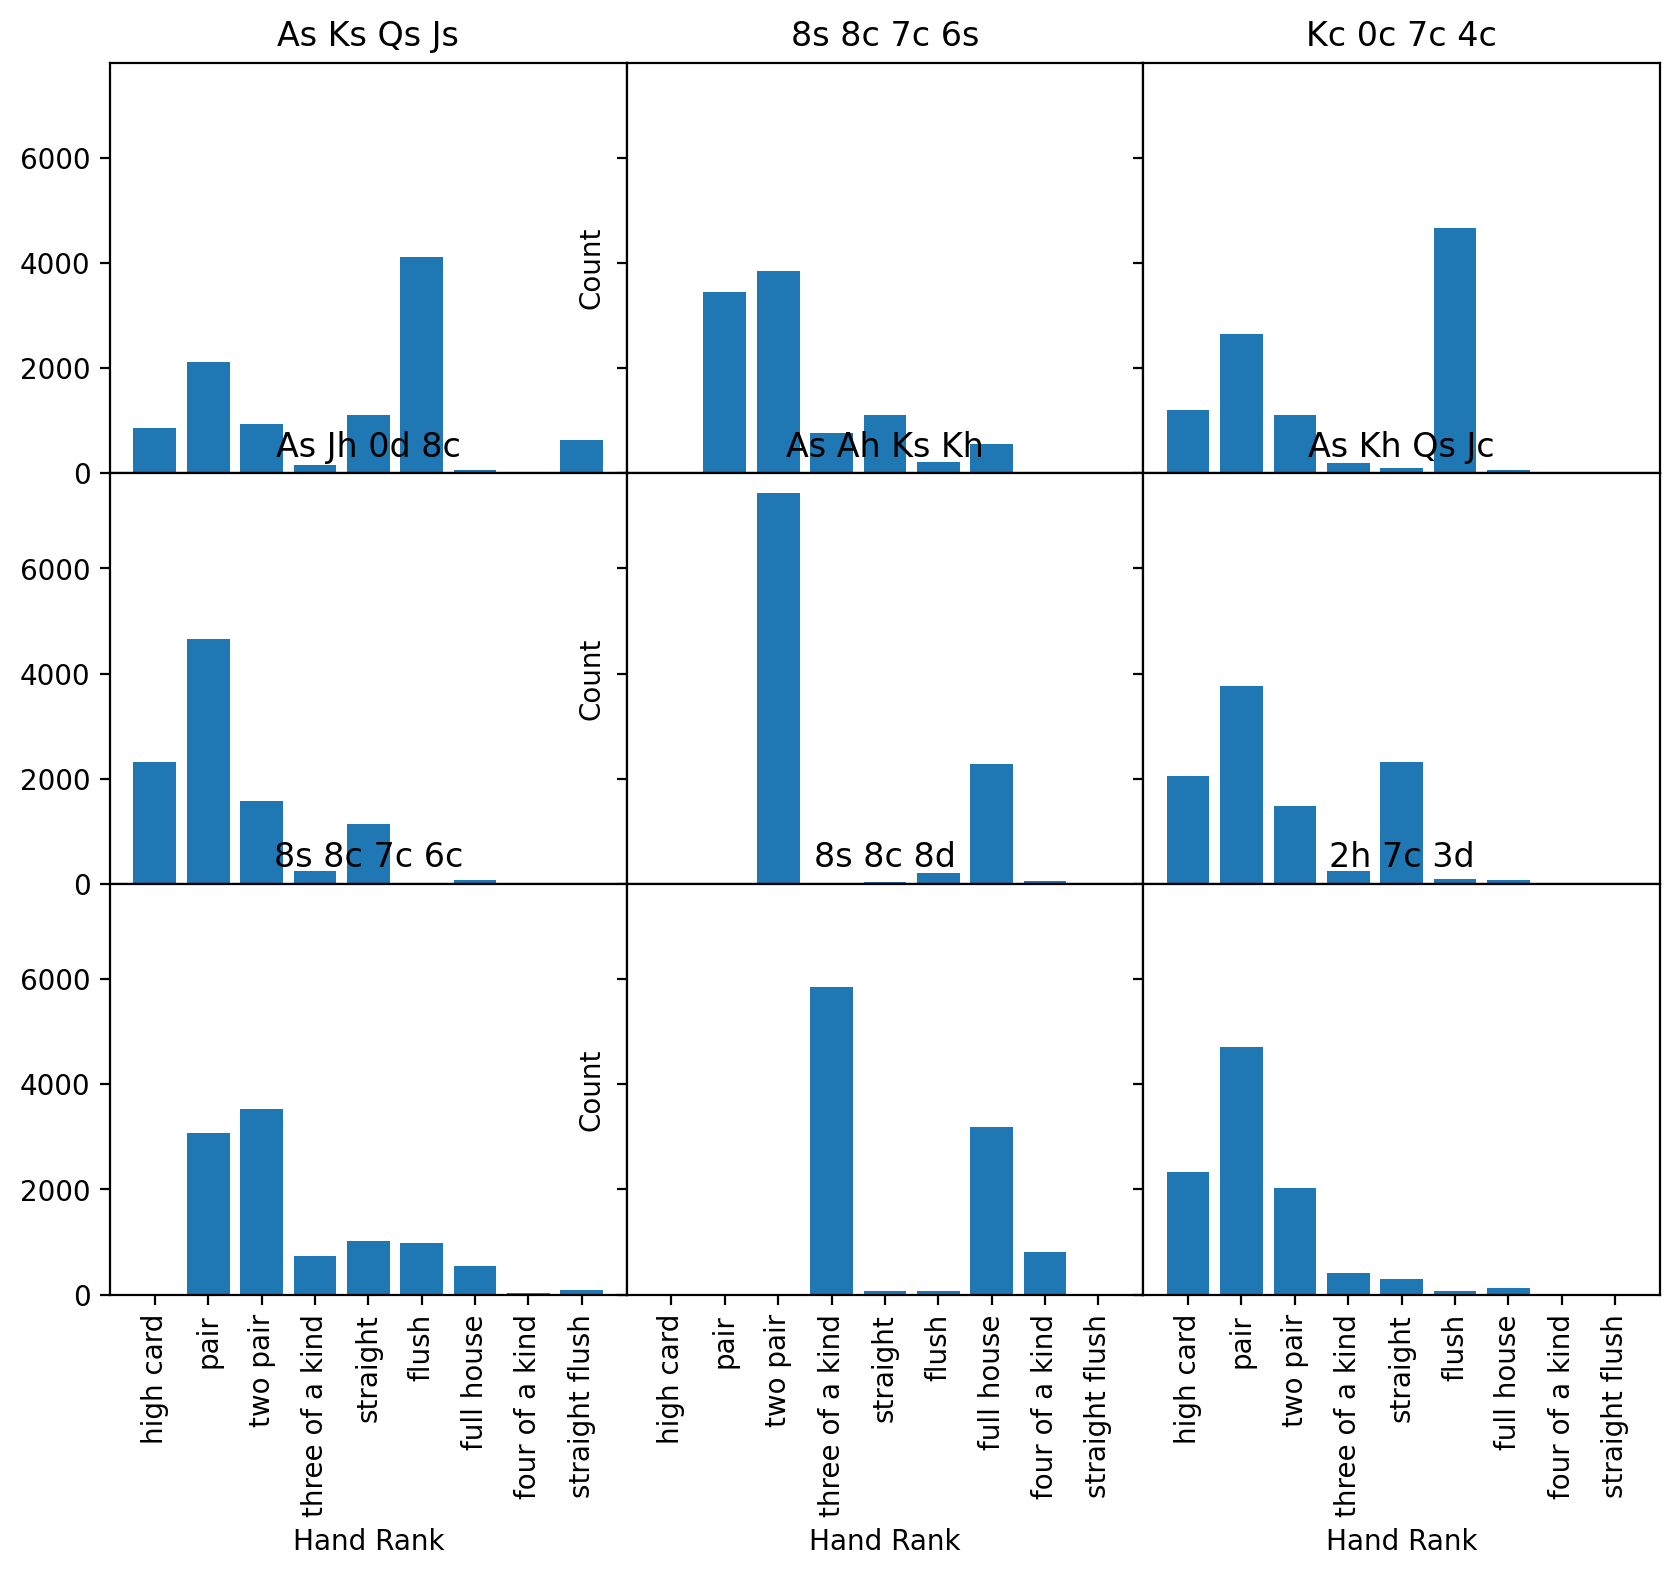

In [112]:
fig, axs = plt.subplots(3, 3, figsize=(10, 8), sharex=True, sharey=True)

for i, ax in enumerate(axs.flatten()):
    result_series = poker9.iloc[i]
    starting_hand = result_series["Cards"]
    count_series = result_series.drop(index=["Cards"])
    counts = count_series.values
    labels = count_series.index

    hist_rank(ax, counts, labels)
    ax.set_title(starting_hand)

fig.subplots_adjust(hspace=0, wspace=0)

# Add axis labels to ONLY the left-most axes for the y-label and bottom-most for the x-label
for ax in axs[:, 1]:
    ax.set_ylabel("Count")
for ax in axs[-1, :]:
    ax.set_xlabel("Hand Rank")

We have an issue here that the title doesn't quite work to display the starter cards on each axes element. Let's instead forego the title and use a text element to place the data in the units of the plot so that it's right-aligned in the top of each axes element.

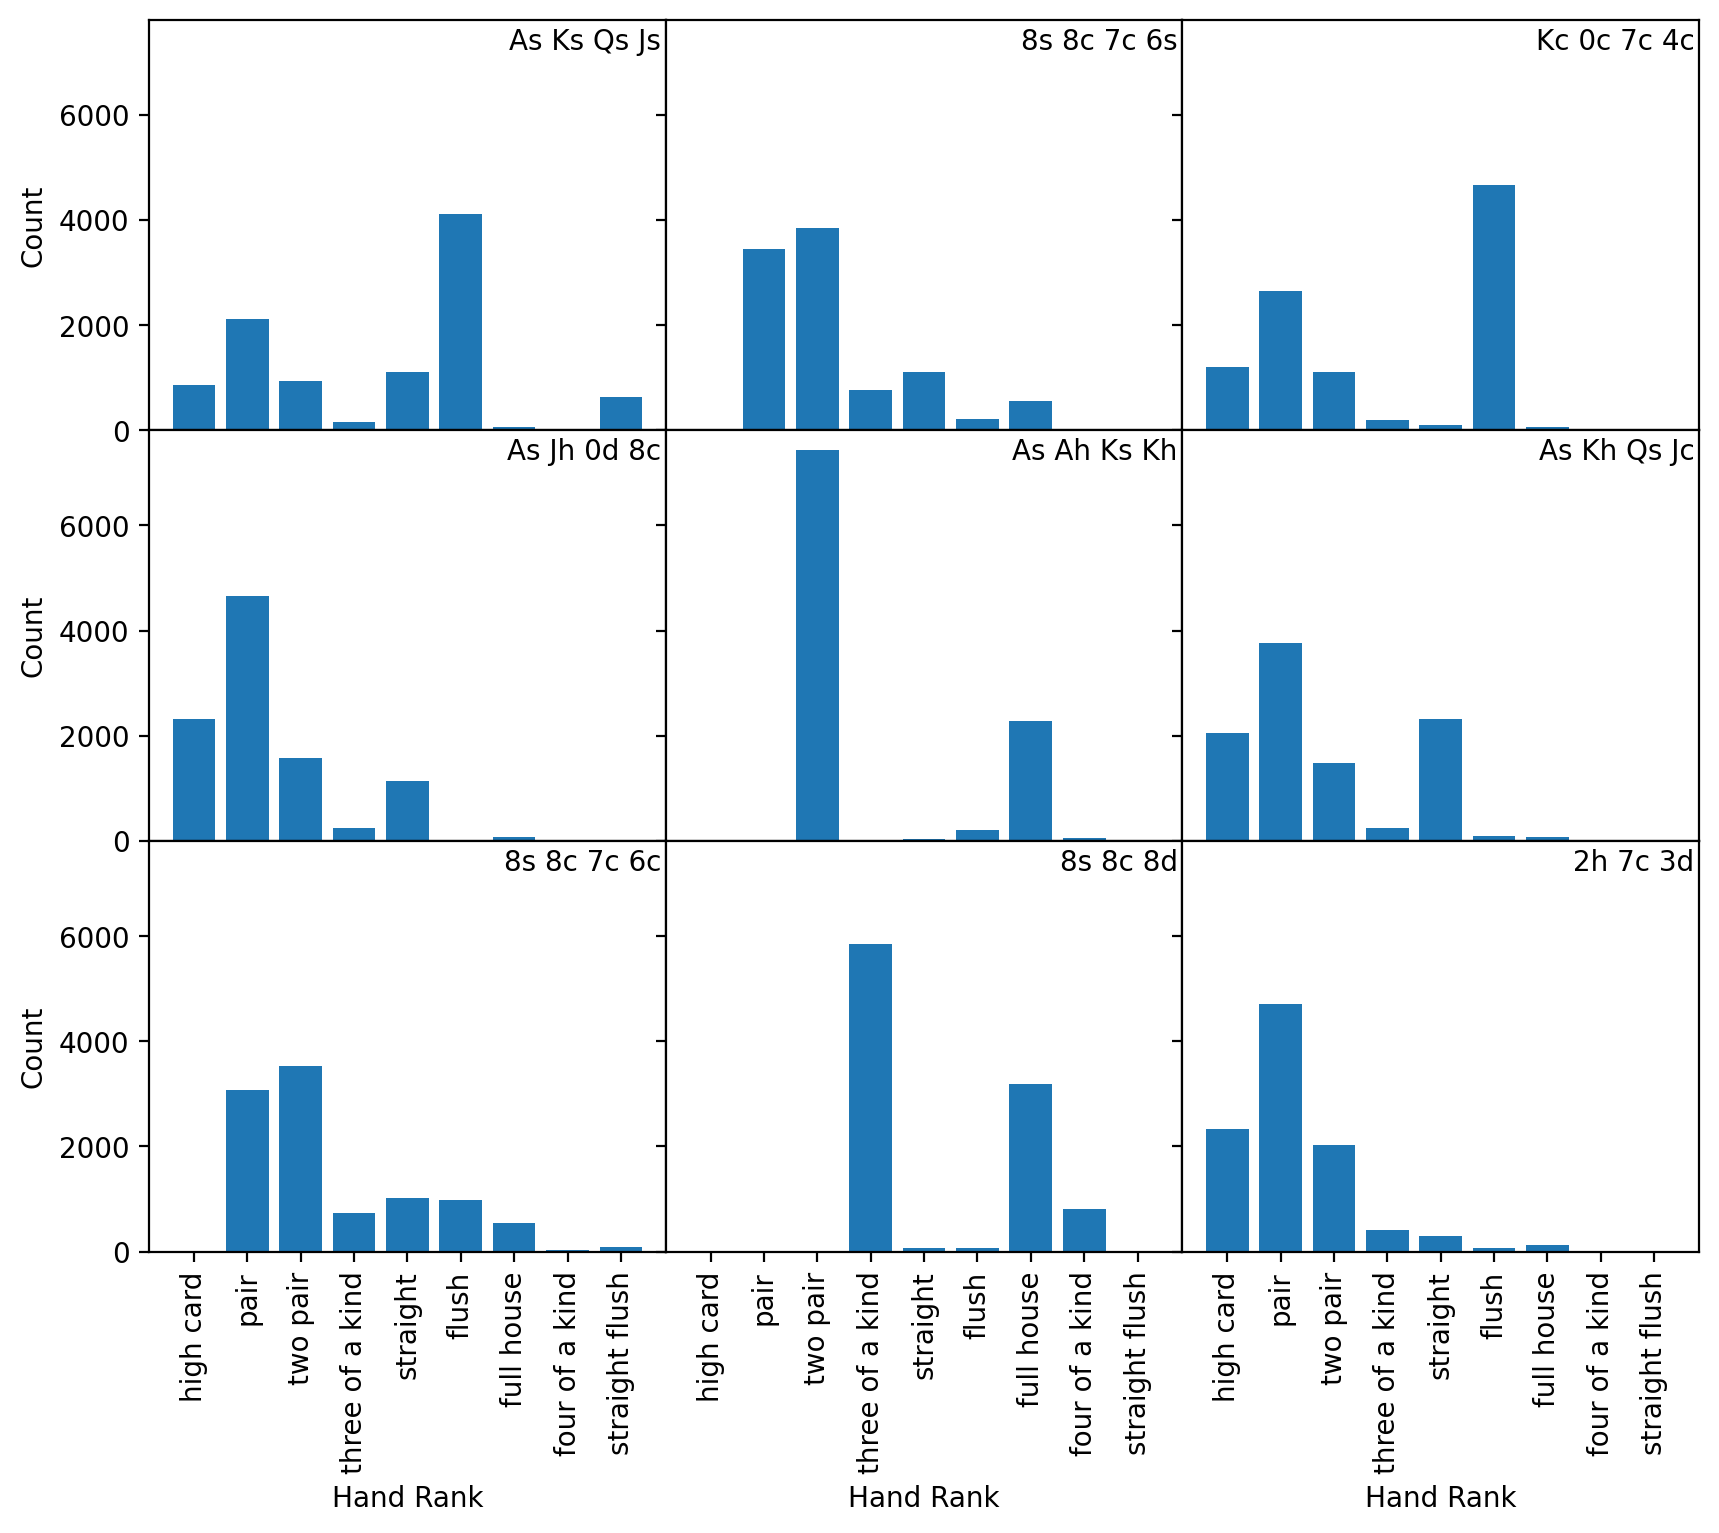

In [131]:
fig, axs = plt.subplots(3, 3, figsize=(10, 8), sharex=True, sharey=True)

for i, ax in enumerate(axs.flatten()):
    result_series = poker9.iloc[i]
    starting_hand = result_series["Cards"]
    count_series = result_series.drop(index=["Cards"])
    counts = count_series.values
    labels = count_series.index

    hist_rank(ax, counts, labels)
    # ax.set_title(starting_hand, y=0.85, x=0.1)
    ax.text(8.75, 7250, starting_hand, horizontalalignment="right")

fig.subplots_adjust(hspace=0, wspace=0)

# Add axis labels to ONLY the left-most axes for the y-label and bottom-most for the x-label
for ax in axs[:, 0]:
    ax.set_ylabel("Count")
for ax in axs[-1, :]:
    ax.set_xlabel("Hand Rank")

With this, we can now easily compare how starting with each set of cards affects possible hand ranks with all seven cards. The case of 'As, Jh, 0d, 8c' tends to lead to the worst possible hand ranks with few high-valued outcomes. Starting with a three-of-a-kind ('8s, 8c, 8d') on the other hand, puts a minimum on the possible outcomes and makes a full house and four-of-a-kind far more likely than other cards.

The type of plot above is called a small multiple, where the axes are the same for all the plots allowing for easier direct comparison across each of the plots.